In [1]:
import autograd.numpy as ag_np
import matplotlib.pyplot as plt
from AbstractBaseCollabFilterSGD import AbstractBaseCollabFilterSGD
from train_valid_test_loader import load_train_valid_test_datasets

from CollabFilterOneVectorPerItem import CollabFilterOneVectorPerItem

In [2]:
# Load the dataset
train_tuple, valid_tuple, test_tuple, n_users, n_items = \
    load_train_valid_test_datasets()

In [3]:
# Create the model and initialize its parameters
# to have right scale as the dataset (right num users and items)
model_k2 = CollabFilterOneVectorPerItem(
    n_epochs=200, batch_size=1000, step_size=0.9,
    alpha=0, n_factors=2)
model_k2.init_parameter_dict(n_users, n_items, train_tuple)

In [4]:
model_k10 = CollabFilterOneVectorPerItem(
    n_epochs=200, batch_size=1000, step_size=0.9,
    alpha=0, n_factors=10)
model_k10.init_parameter_dict(n_users, n_items, train_tuple)

In [5]:
model_k50 = CollabFilterOneVectorPerItem(
    n_epochs=200, batch_size=1000, step_size=0.9,
    alpha=0, n_factors=50)
model_k50.init_parameter_dict(n_users, n_items, train_tuple)

In [6]:
# Fit the model with SGD
model_k2.fit(train_tuple, valid_tuple)
model_k10.fit(train_tuple, valid_tuple)
model_k50.fit(train_tuple, valid_tuple)

Text(0.5, 1.0, 'K=50')

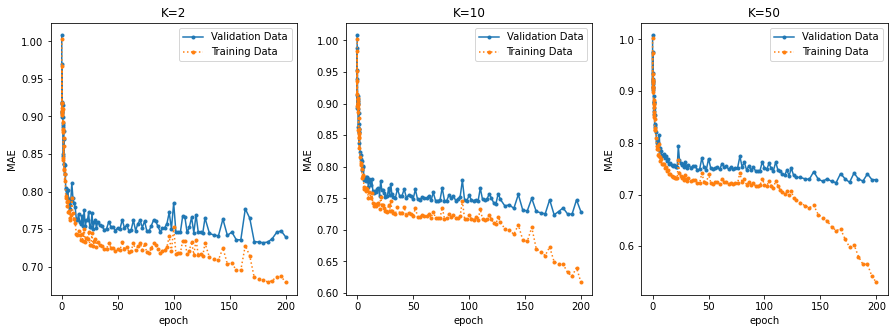

In [7]:
f, axs = plt.subplots(1,3,figsize=(15,5))

plt.subplot(1,3,1)
plt.plot(model_k2.trace_epoch, model_k2.trace_mae_valid, '.-')
plt.plot(model_k2.trace_epoch, model_k2.trace_mae_train, '.:')
plt.xlabel("epoch")
plt.ylabel("MAE")
plt.legend(["Validation Data", "Training Data"])
plt.title("K=2")

plt.subplot(1,3,2)
plt.plot(model_k10.trace_epoch, model_k10.trace_mae_valid, '.-')
plt.plot(model_k10.trace_epoch, model_k10.trace_mae_train, '.:')
plt.xlabel("epoch")
plt.ylabel("MAE")
plt.legend(["Validation Data", "Training Data"])
plt.title("K=10")

plt.subplot(1,3,3)
plt.plot(model_k50.trace_epoch, model_k50.trace_mae_valid, '.-')
plt.plot(model_k50.trace_epoch, model_k50.trace_mae_train, '.:')
plt.xlabel("epoch")
plt.ylabel("MAE")
plt.legend(["Validation Data", "Training Data"])
plt.title("K=50")

In [8]:
print(min(model_k2.trace_mae_valid))
print(min(model_k10.trace_mae_valid))
print(min(model_k50.trace_mae_valid))

0.7319426229976639
0.7239810984640677
0.7229658124969393


In [9]:
model_k50.trace_epoch[ag_np.argmin(model_k10.trace_mae_valid)]

176.0

In [10]:
k = [2, 10, 50]
a = [0, 0.001, 0.01, 0.1, 0.5]
model_list=list()
for k_val in k:
    for a_val in a:
        model_list.append(CollabFilterOneVectorPerItem(
            n_epochs=200, batch_size=1000, step_size=0.9,
            alpha=a_val, n_factors=k_val))

Model  1  of  15  trained.
Model  2  of  15  trained.
Model  3  of  15  trained.
Model  4  of  15  trained.
Model  5  of  15  trained.
Model  6  of  15  trained.
Model  7  of  15  trained.
Model  8  of  15  trained.
Model  9  of  15  trained.
Model  10  of  15  trained.
Model  11  of  15  trained.
Model  12  of  15  trained.
Model  13  of  15  trained.
Model  14  of  15  trained.
Model  15  of  15  trained.


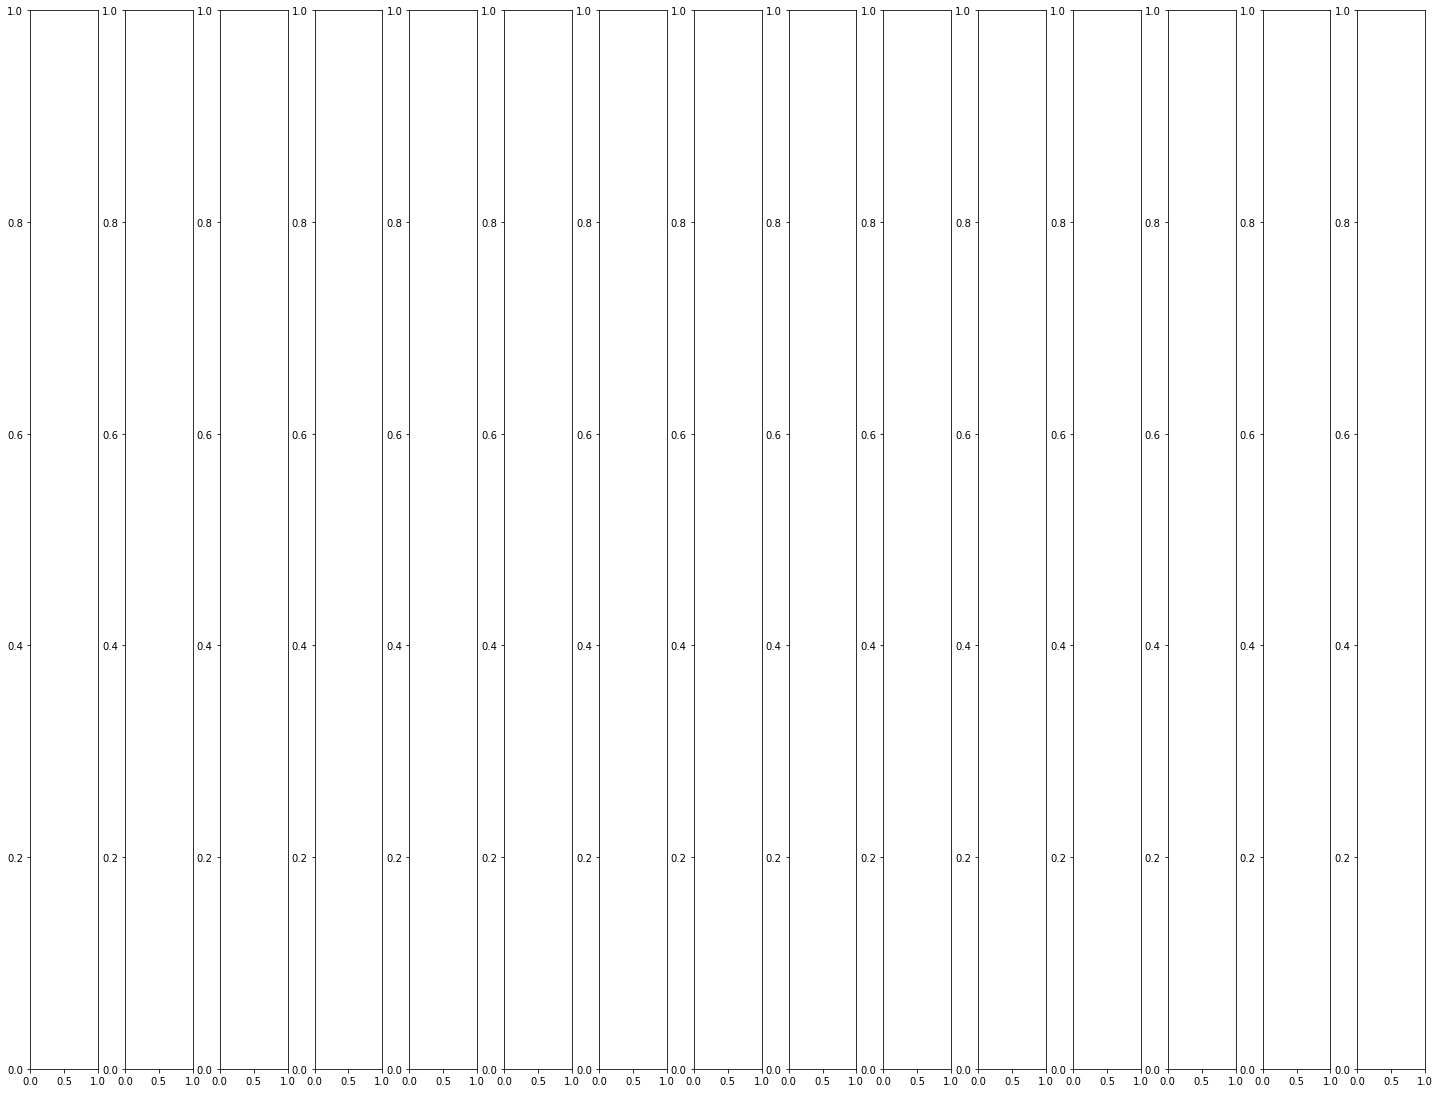

In [12]:
M = len(model_list)
n_trials = M
n_rows = ag_np.ceil(n_trials/5)
n_cols = min(n_trials,5)

for i, model in enumerate(model_list):
    model.init_parameter_dict(n_users, n_items, train_tuple)
    model.fit(train_tuple, valid_tuple)
    print("Model ", i+1, " of ", M, " trained.")

<ipython-input-18-5b80af98797f>:4: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(n_rows,n_cols,i+1)


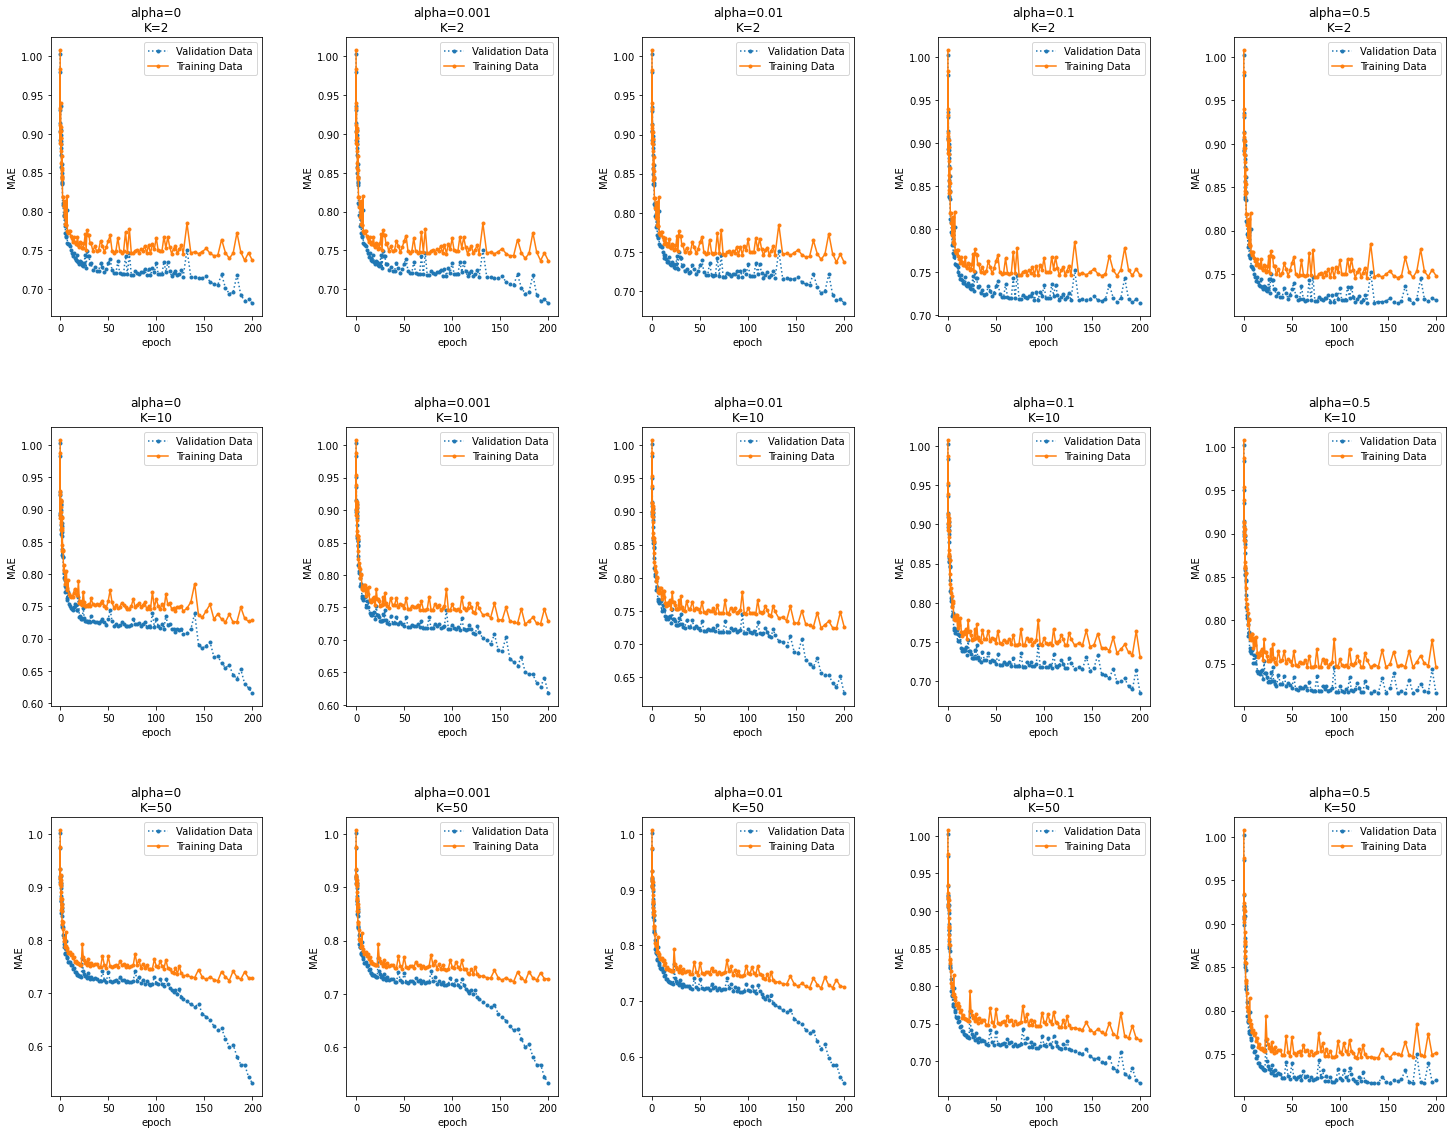

In [18]:
f, axs = plt.subplots(1,n_trials,figsize=(5*n_cols,5*n_rows))
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.4, wspace=0.4)
for i, model in enumerate(model_list):
    plt.subplot(n_rows,n_cols,i+1)
    plt.plot(model_list[i].trace_epoch, model_list[i].trace_mae_train, '.:')
    plt.plot(model_list[i].trace_epoch, model_list[i].trace_mae_valid, '.-')
    plt.xlabel("epoch")
    plt.ylabel("MAE")
    plt.legend(["Validation Data", "Training Data"])
    plt.title("alpha=" + str(a[i%5]) + "\nK=" + str(k[int(i/5)]))

In [22]:
min_maes = ag_np.ones(15)
min_epoch = ag_np.ones(15)
for i in range(M):
    min_maes[i] = ag_np.min(model_list[i].trace_mae_valid)
    min_epoch[i] = model_list[i].trace_epoch[ag_np.argmin(model_list[i].trace_mae_valid)]
print(min_maes[0:5])
print(min_maes[5:10])
print(min_maes[10:15])
print(min_epoch)

[0.7370227  0.73699047 0.73671715 0.74552778 0.74573707]
[0.72532531 0.72399701 0.72406422 0.73091027 0.74579041]
[0.72296581 0.72300697 0.72320055 0.72813914 0.74588749]
[192.         199.98571429 199.98571429 176.         160.
 180.         176.         192.         199.98571429 199.98571429
 164.         164.         176.         199.98571429 118.        ]


In [26]:
yhat2_te_L = model_list[2].predict(test_tuple[0], test_tuple[1], model_list[2].param_dict['mu'], model_list[2].param_dict['b_per_user'], model_list[2].param_dict['c_per_item'], model_list[2].param_dict['U'], model_list[2].param_dict['V'])
yhat10_te_L = model_list[6].predict(test_tuple[0], test_tuple[1], model_list[6].param_dict['mu'], model_list[6].param_dict['b_per_user'], model_list[6].param_dict['c_per_item'], model_list[6].param_dict['U'], model_list[6].param_dict['V'])
yhat50_te_L = model_list[10].predict(test_tuple[0], test_tuple[1], model_list[10].param_dict['mu'], model_list[10].param_dict['b_per_user'], model_list[10].param_dict['c_per_item'], model_list[10].param_dict['U'], model_list[10].param_dict['V'])
MAE2 = ag_np.mean(ag_np.absolute(yhat2_te_L - test_tuple[2]))
MAE10 = ag_np.mean(ag_np.absolute(yhat10_te_L - test_tuple[2]))
MAE50 = ag_np.mean(ag_np.absolute(yhat50_te_L - test_tuple[2]))
print(MAE2)
print(MAE10)
print(MAE50)

0.748095596223847
0.7235345532735938
0.7232975181157845


In [29]:
import pandas as pd
select_movies_df = pd.read_csv("./data_movie_lens_100k/select_movies.csv")

In [32]:
item_ids = []
for iid in model_list[2].trainset.all_items():
    item_ids.append(int(model_list[2].trainset.to_raw_iid(iid)))
item_ids = np.asarray(item_ids)

AttributeError: 'CollabFilterOneVectorPerItem' object has no attribute 'trainset'

In [31]:
for sid, itemid in enumerate(select_movies_df['item_id'].values):
    title = select_movies_df['title'].values[sid]
    row_id = ag_np.flatnonzero(item_ids == itemid)[0]
    movie_vec_2 = model_list[2].qi[row_id,:]
    plt.plot(movie_vec_2[0], movie_vec_2[1], 'k.', mew=5)
    plt.text(movie_vec_2[0] + B, movie_vec_2[1] + B, title, rotation=15)

NameError: name 'item_ids' is not defined

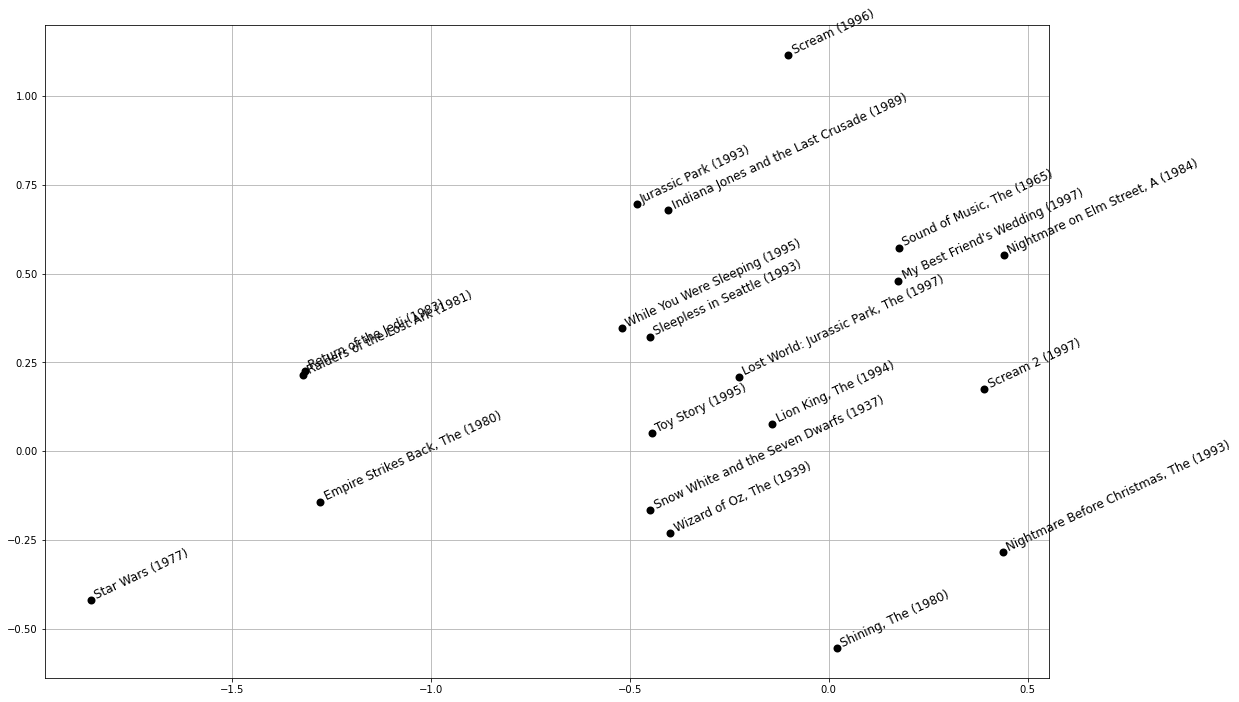

In [63]:
B = 0.005

plt.figure(figsize=(18,12))
plt.grid()
for i in range(len(select_movies_df['item_id'])):
    title = select_movies_df['title'][i]
    movie_id = select_movies_df['item_id'][i]
    x_val = model_list[2].param_dict['V'][movie_id][0]
    y_val = model_list[2].param_dict['V'][movie_id][1]
    plt.plot(x_val, y_val, 'k.', mew=5)
    plt.text(x_val +B, y_val +B, title, rotation=25, fontsize=12)

In [ ]:
M = len(model_list)
f, axs = plt.subplots(1,M,figsize=(5*M,5))

for i in range(M):
    plt.subplot(1,M,i+1)
    plt.plot(model_list[i].trace_epoch, model_list[i].trace_mae_valid, '.-')
    plt.plot(model_list[i].trace_epoch, model_list[i].trace_mae_train, '.:')
    plt.xlabel("epoch")
    plt.ylabel("MAE")
    plt.legend(["Validation Data", "Training Data"])
    plt.title("alpha=" + str(a[i]))

In [ ]:
for i in range(M):
    #print(min(model_list[i].trace_mae_valid))
    print("U: ", ag_np.sum(ag_np.square(model_list[i].param_dict['U'])))
print()
for i in range(M):
    print("V: ", ag_np.sum(ag_np.square(model_list[i].param_dict['V'])))

In [ ]:
min_maes = ag_np.ones(5)
min_epoch = ag_np.ones(5)
for i in range(M):
    min_maes[i] = ag_np.min(model_list[i].trace_mae_valid)
    min_epoch[i] = model_list[i].trace_epoch[ag_np.argmin(model_list[i].trace_mae_valid)]
print(min_maes)
print(min_epoch)